### Angelo Zhu
### 59714552
### Kaggle username: angelozhu

## Problem 1

### Part 1

### Part 2

### Part 3

## Problem 2

### Part 1

In [1]:
import numpy as np
import mltools as ml

X = np.genfromtxt('C:/Users/Angelo/Downloads/178-hw4-code/data/X_train.txt', delimiter=',')
Y = np.genfromtxt('C:/Users/Angelo/Downloads/178-hw4-code/data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
X = X[:,:41] # keep only the numeric features for now

for i in range(5):
    minimum = min(X[:,i])
    maximum = max(X[:,i])
    mean = np.mean(X[:,i])
    variance = np.var(X[:,i])
    print("Feature {}\n\tMinimum: {}\n\tMaximum: {}\n\tMean: {}\n\tVariance: {}".format(i+1, minimum, maximum, mean, variance))

Feature 1
	Minimum: 0.0
	Maximum: 110285.0
	Mean: 1321.117413444699
	Variance: 6747189.59508532
Feature 2
	Minimum: 0.0
	Maximum: 35.0
	Mean: 6.5916745251246125
	Variance: 34.70690630279573
Feature 3
	Minimum: 0.0
	Maximum: 51536.0
	Mean: 1152.2732372356188
	Variance: 5376518.288798102
Feature 4
	Minimum: 0.0
	Maximum: 21768.0
	Mean: 234.8262548834703
	Variance: 260120.8305329767
Feature 5
	Minimum: 0.0
	Maximum: 27210.0
	Mean: 289.75871211100633
	Variance: 406615.8651128233


### Part 2

In [2]:
def find_MSE(y, yhat):
    total = 0
    for i in range(len(y)):
        total += (y[i] - yhat[i])**2
    return total/len(y)

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.5)
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)
Ytr_hat = learner.predict(Xtr)
Yva_hat = learner.predict(Xva)
tr_error = find_MSE(Ytr, Ytr_hat)
va_error = find_MSE(Yva, Yva_hat)
print("Training Error for maxDepth = 50:", tr_error)
print("Validation Error for maxDepth = 50:", va_error)

Training Error for maxDepth = 50: 0.0
Validation Error for maxDepth = 50: 0.42225815144165996


### Part 3

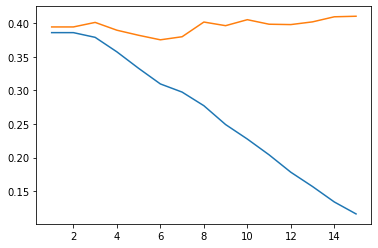

In [3]:
import matplotlib.pyplot as plt

depths = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
tr_error = np.array([None] * len(depths))
va_error = np.array([None] * len(depths))

for i,maxDepth in enumerate(depths):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=maxDepth)
    Ytr_hat = learner.predict(Xtr)
    Yva_hat = learner.predict(Xva)
    tr_error[i] = find_MSE(Ytr, Ytr_hat)
    va_error[i] = find_MSE(Yva, Yva_hat)
    
plt.plot(depths, tr_error, label='Training Error')
plt.plot(depths, va_error,label='Validation Error')
plt.show()

Models with higher maxDepth have higher complexity.
maxDepth of 6 provides the best decision tree model because validation error is at a minimum. We can see that maxDepths greater than 6 start overfitting because validation error keeps increasing.

### Part 4

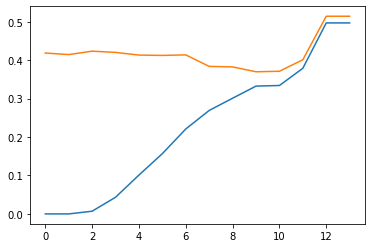

In [4]:
minParent = range(0, 14)
tr_error2 = np.array([None] * len(minParent))
va_error2 = np.array([None] * len(minParent))

for i in minParent:
    minP = np.power(2, i)
    learner_minParent = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50, minParent=minP)
    Ytr_hat = learner_minParent.predict(Xtr)
    Yva_hat = learner_minParent.predict(Xva)
    tr_error2[i] = find_MSE(Ytr, Ytr_hat)
    va_error2[i] = find_MSE(Yva, Yva_hat)
    
plt.plot(minParent, tr_error2, label='Training Error')
plt.plot(minParent, va_error2,label='Validation Error')
plt.show()

As minParent increases, the minimum amount of data needed to split increases, resulting in less splits. Therefore, models with higher minParent have lower complexity.
minParent of 9 has provides the best decision tree model because it has the lowest validation error and validation error spikes for minParents greater than 11, indicating overfitting.

### Part 5

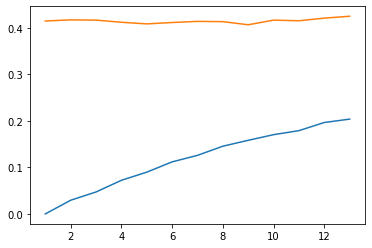

In [5]:
minLeaf = range(1, 14) #13
tr_error3 = np.array([None] * len(minLeaf)) #index 0->14
va_error3 = np.array([None] * len(minLeaf))

for i,minL in enumerate(minLeaf):
    learner_minLeaf = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50, minLeaf=minL)
    Ytr_hat = learner_minLeaf.predict(Xtr)
    Yva_hat = learner_minLeaf.predict(Xva)
    tr_error3[i] = find_MSE(Ytr, Ytr_hat)
    va_error3[i] = find_MSE(Yva, Yva_hat)
    
plt.plot(minLeaf, tr_error3, label='Training Error')
plt.plot(minLeaf, va_error3, label='Validation Error')
plt.show()

The higher the value of minLeaf, the lower the complexity, just like minParent.

### Part 6

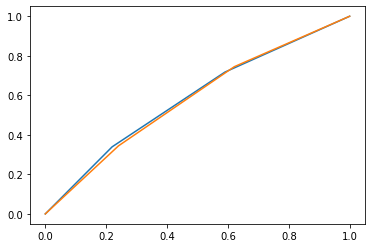

AUC Training: 0.5957635911597077
AUC Validation: 0.5835262042879851


In [6]:
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50, minParent=2**6, minLeaf=2**10)
ROC_tr = learner.roc(Xtr, Ytr)
ROC_va = learner.roc(Xva, Yva)
plt.plot(ROC_tr[0], ROC_tr[1])
plt.plot(ROC_va[0], ROC_va[1])
plt.show()
print("AUC Training:", learner.auc(Xtr, Ytr))
print("AUC Validation:", learner.auc(Xva, Yva))

### Part 7

In [7]:
X = np.genfromtxt('C:/Users/Angelo/Downloads/178-hw4-code/data/X_train.txt', delimiter=',')
Y = np.genfromtxt('C:/Users/Angelo/Downloads/178-hw4-code/data/Y_train.txt', delimiter=',')

learner = ml.dtree.treeClassify(X, Y, maxDepth=6, minParent=9, minLeaf=10)
Yhat_kaggle = learner.predict(X)
error_kaggle = find_MSE(Y, Yhat_kaggle)

AUC_kaggle = learner.auc(X, Y)
print("Error:", error_kaggle)
print("AUC:", AUC_kaggle)

Xte = np.genfromtxt('C:/Users/Angelo/Downloads/178-hw4-code/data/X_test.txt', delimiter=',')
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='Id,Predicted',delimiter=',')

Error: 0.32722618887242355
AUC: 0.7483597960502969


Kaggle: 0.71640

## Problem 3: Option 1 Random Forests

### Part 1

Ensemble 1 training error: 0.25191596685493467
	validation error: 0.2599342512711559
Ensemble 5 training error: 0.24996815140550682
	validation error: 0.25003810690191736
Ensemble 10 training error: 0.25029120446385444
	validation error: 0.2500318592260071
Ensemble 25 training error: 0.24986672255870995
	validation error: 0.2506268958962485


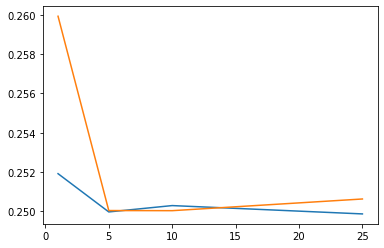

In [8]:
from random import random

X = np.genfromtxt('C:/Users/Angelo/Downloads/178-hw4-code/data/X_train.txt', delimiter=',')
Y = np.genfromtxt('C:/Users/Angelo/Downloads/178-hw4-code/data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.5)

nBags = 25
M,N = Xva.shape
classifiers = [None] * nBags
tr_error_forest = [None] * 4
va_error_forest = [None] * 4
Ytr_hat = np.zeros((len(Ytr), nBags))
Yva_hat = np.zeros((len(Yva), nBags))

for i in range(nBags):
    ind = np.floor(M * np.random.rand(N)).astype(int)
    Xi, Yi = Xva[ind,:] , Yva[ind] # select the data at those indices
    #Xi, Yi = ml.bootstrapData(Xva, Yva)
    classifiers[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth=20, minLeaf=4, nFeatures=int(random() * N) + 1)
    Ytr_hat[:,i] = classifiers[i].predict(Xtr)
    Yva_hat[:,i] = classifiers[i].predict(Xva)

for i,v in enumerate([1,5,10,25]):    
    tr_error_forest[i] = np.mean((Ytr - np.mean(Ytr_hat[:,0:v]))**2)
    va_error_forest[i] = np.mean((Yva - np.mean(Yva_hat[:,0:v]))**2)

plt.plot([1,5,10,25], tr_error_forest)
plt.plot([1,5,10,25], va_error_forest)
for i,v in enumerate([1,5,10,25]):
    print("Ensemble {} training error: {}\n\tvalidation error: {}"
          .format(v, tr_error_forest[i], va_error_forest[i]))

### Part 2

In [9]:
# test on data Xtest
e_size = 25
ensemble = [None] * e_size
mTest = X.shape[0]
predict = np.zeros((mTest, e_size)) # Allocate space for predictions from each model

for i in range(e_size):
    ind = np.floor(M * np.random.rand(N)).astype(int)
    Xi, Yi = X[ind,:] , Y[ind] # select the data at those indices
    ensemble[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth=20, minLeaf=4, nFeatures=int(random() * N) + 1)
    
    predict[:,i] = ensemble[i].predictSoft(X)[:,1] # Apply each classifier

predictions = []
for i in range(len(predict)):
    if np.mean(predict[i]) >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)
        
predict = np.mean(predict, axis=1)
Xte = np.genfromtxt('C:/Users/Angelo/Downloads/178-hw4-code/data/X_test.txt', delimiter=',')
Yte = np.vstack((np.arange(Xte.shape[0]), predict[1:])).T
np.savetxt('Y_submit_ensemble.txt',Yte,'%d, %.2f',header='Id,Predicted',delimiter=',')

Kaggle: 0.71630

## Statement of Collaboration
piazza, lecture slides for pseudocode